# **Getting the Dataset**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science/Spam Email Detection/smsspamcollection.tsv', sep='\t')

In [56]:
dataset.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [57]:
dataset.isna().sum()

,0
label,0
message,0
length,0
punct,0


In [58]:
label_mapping = {'ham': 0, 'spam': 1}

# **Building a Model**

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [60]:
np.random.seed(42)
X = dataset.drop(columns=['label', 'message'], axis = 1)
y = dataset['label'].map(label_mapping)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8851674641148325

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
lr_model = LogisticRegression(solver='lbfgs')

In [63]:
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8427033492822966

In [64]:
y_preds = clf.predict(X_test)

In [65]:
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score

In [66]:
precision_score(y_test, y_preds)

0.5833333333333334

In [67]:
f1_score(y_test, y_preds)

0.5384615384615384

In [68]:
recall_score(y_test, y_preds)

0.5

In [69]:
accuracy_score(y_test, y_preds)

0.8851674641148325

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1448
           1       0.58      0.50      0.54       224

    accuracy                           0.89      1672
   macro avg       0.75      0.72      0.74      1672
weighted avg       0.88      0.89      0.88      1672



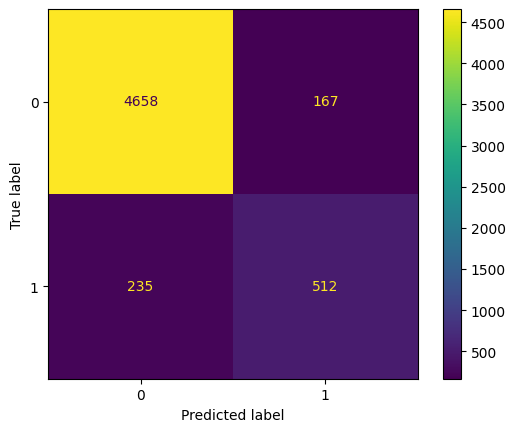

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

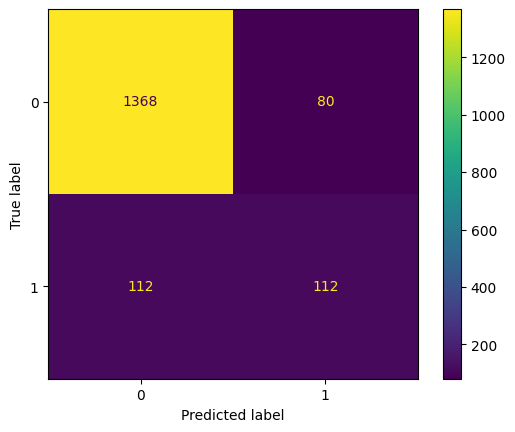

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [73]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,1368,80
1,112,112


# **Feature Extraction**

In [74]:
X = dataset['message']
y = dataset['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [76]:
X_train_counts = count_vect.fit_transform(X_train)

In [77]:
X_train_counts

<3900x7263 sparse matrix of type '<class 'numpy.int64'>'
	with 52150 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [79]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [81]:
# Does both the steps (CountVectorizer and TfidfTransformer) in one step
X_train_vector = vectorizer.fit_transform(X_train)

In [82]:
X_test_vector = vectorizer.transform(X_test)

In [87]:
from sklearn.pipeline import Pipeline

In [89]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9802631578947368

In [90]:
y_preds = clf.predict(X_test)

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       1.00      0.85      0.92       224

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.95      1672
weighted avg       0.98      0.98      0.98      1672



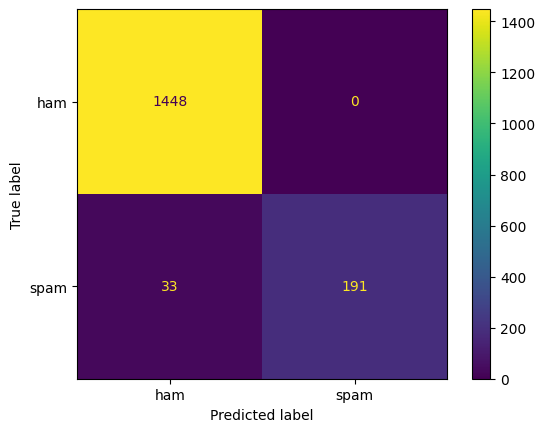

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

In [95]:
clf.predict(["Congratulations! You have won $1 million. Follow these steps to collect the prize"])

array(['spam'], dtype=object)